In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
## to upload file(s) from your github

realestate_url = 'https://raw.githubusercontent.com/xpython21/Colab/main/Data/real_estate.csv'

In [ ]:
## Load the training dataset

data = pd.read_csv(realestate_url)
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
## Get info() from data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
## Get the label column

label = data[data.columns[-1]]

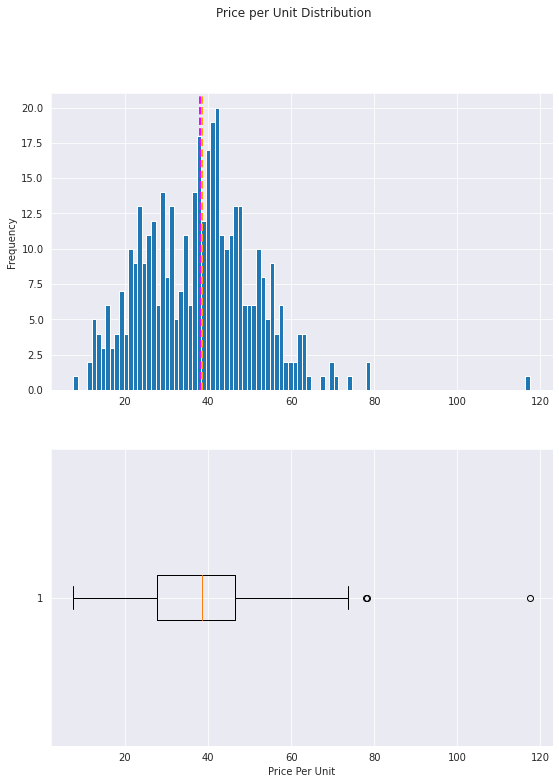

In [ ]:
## Set the style to darkgrid

sns.set_style('darkgrid')

## Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

## Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

## Add lines for mean, median, mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='orange', linestyle='dashed', linewidth=2)

## Plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price Per Unit')

## Add a title to the figure
fig.suptitle('Price per Unit Distribution')

## Show the figure
fig.show()

In [ ]:
## Get statistics for label

data['price_per_unit'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: price_per_unit, dtype: float64

In [ ]:
higher_wh = 46.6 + 1.5 * (46.6 - 27.7)
lower_wh = 27.7 - 1.5 * (46.6 - 27.7)

print('Higher whisker: ', str(higher_wh))
print('Lower whisker: ', str(np.round(lower_wh, 2)))

Higher whisker:  74.95
Lower whisker:  -0.65


In [ ]:
## Remove outliers

data = data[data['price_per_unit'] <= 74.95]

## Get the label column

label = data[data.columns[-1]]

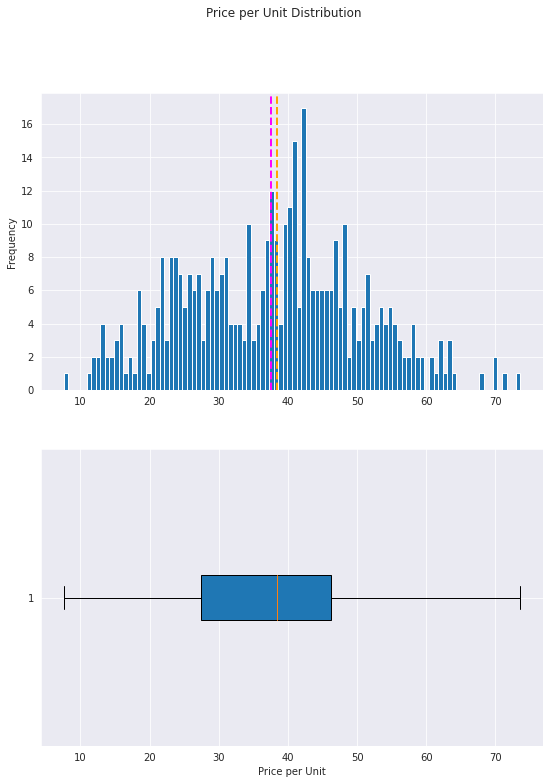

In [ ]:
## Create a figure for 2 subplots (1, 2)
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

## Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

## Add lines for mean and median
ax[0].axvline(label.mean(), color='magenta', linestyle='--', linewidth=2)
ax[0].axvline(label.median(), color='orange', linestyle='--', linewidth=2)

## Plot the boxplot
ax[1].boxplot(label, vert=False, patch_artist=True)
ax[1].set_xlabel('Price per Unit')

## Add a title to the figure
fig.suptitle('Price per Unit Distribution')

## Show the figure
fig.show()

In [ ]:
print(data.columns)
print(data.columns[0:-1])

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')
Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude'],
      dtype='object')


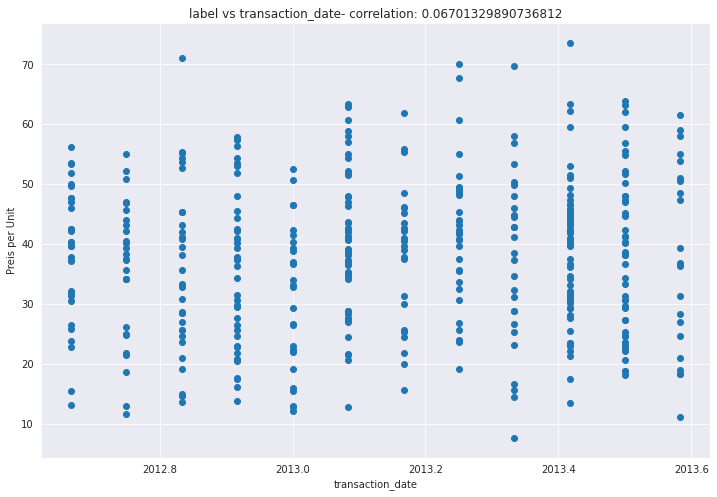

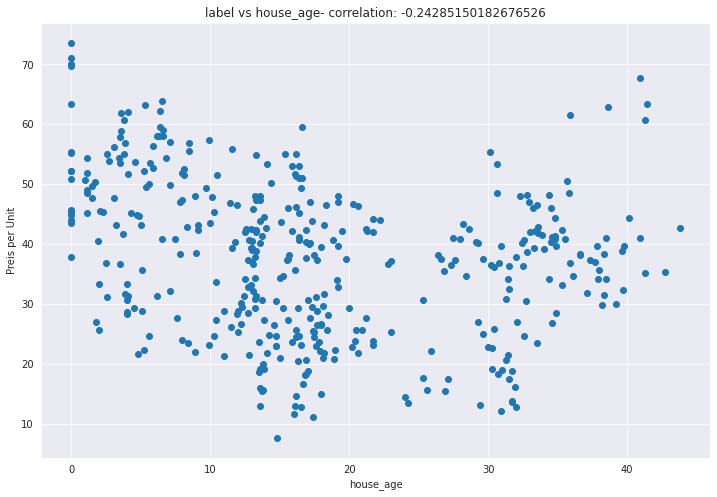

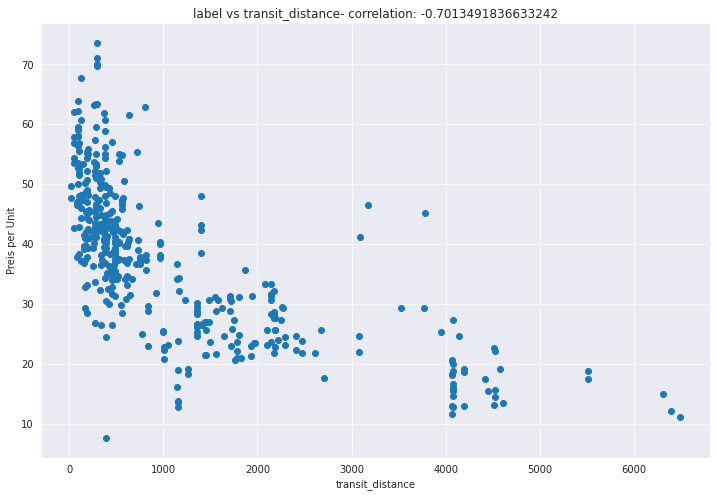

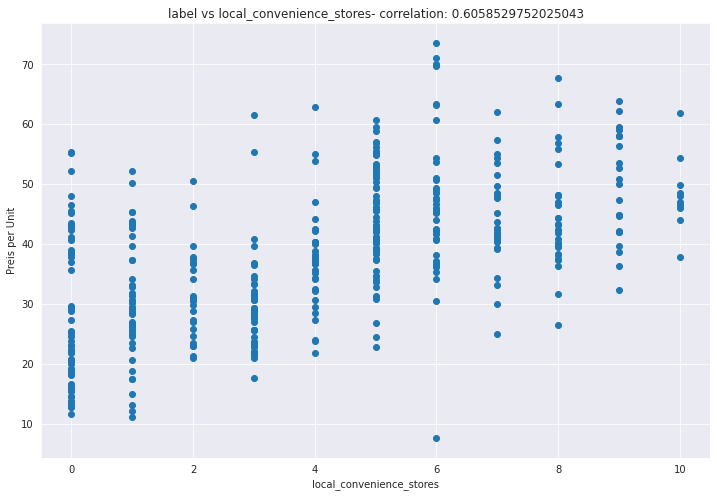

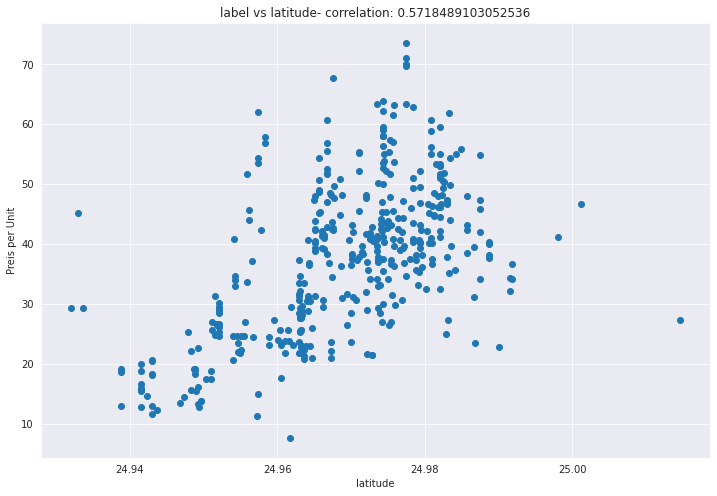

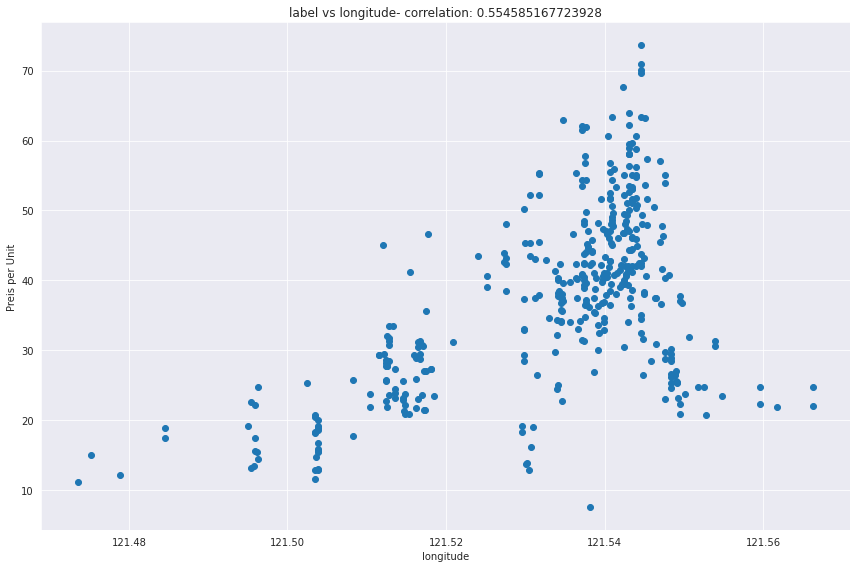

In [ ]:
for col in data[data.columns[0:-1]]:
  fig = plt.figure(figsize=(12, 8))
  ax = plt.gca()
  

  feature = data[col]
  label = data['price_per_unit']

  correlation = feature.corr(label)

  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Preis per Unit')

  ax.set_title('label vs ' +  col + '- correlation: ' + str(correlation))

fig.tight_layout()
fig.show()